In [85]:
from flask import Flask, request
from sqlalchemy import create_engine
import pandas as pd
import psycopg2

engine = create_engine("")

In [86]:

file_ = open("/Users/aditya/Downloads/data_dumm - data_akbilgic.csv", "r")
file_two = open("/Users/aditya/Downloads/winequality-red - winequality-red.csv","r")

df = pd.read_csv(file_)
df.to_sql(file_.name,con=engine)
filename = file_.name

# print(engine.execute('select * from temp_table').fetchall())

In [87]:
results = (engine.execute(f"SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{filename}' AND DATA_TYPE='double precision' ORDER BY ORDINAL_POSITION").fetchall())


L = {}

for row in results:
    row_name = row[0]
    zscore = f'''
    WITH attr_table as 

    (SELECT AVG("{row_name}") AS MEAN,
            STDDEV("{row_name}") AS STDEV FROM "{filename}")

    SELECT ABS("{row_name}" - attr_table.MEAN) / attr_table.STDEV as ZSCORE

    FROM attr_table, "{filename}"
    '''
    
    
    
    
    
    
    z = (engine.execute(zscore).fetchall())
#     z = list(map(lambda x:x[0], z))
    L[row_name] = z
    d_list = []
    for p in L.keys():
        
        d_list.append(pd.DataFrame( L[p], columns=[p]))
        
    print(d_list)
    
    


# print({"L":L})

[       ISE-TL
0    2.098147
1    1.463146
2    1.874699
3    3.924981
4    0.506080
..        ...
531  0.428558
532  0.472289
533  0.088409
534  0.903694
535  0.545687

[536 rows x 1 columns]]
[       ISE-TL
0    2.098147
1    1.463146
2    1.874699
3    3.924981
4    0.506080
..        ...
531  0.428558
532  0.472289
533  0.088409
534  0.903694
535  0.545687

[536 rows x 1 columns],       ISE-USD
0    1.743400
1    1.432659
2    1.321148
3    4.084293
4    0.383766
..        ...
531  0.560918
532  0.682939
533  0.151730
534  0.722387
535  0.993947

[536 rows x 1 columns]]
[       ISE-TL
0    2.098147
1    1.463146
2    1.874699
3    3.924981
4    0.506080
..        ...
531  0.428558
532  0.472289
533  0.088409
534  0.903694
535  0.545687

[536 rows x 1 columns],       ISE-USD
0    1.743400
1    1.432659
2    1.321148
3    4.084293
4    0.383766
..        ...
531  0.560918
532  0.682939
533  0.151730
534  0.722387
535  0.993947

[536 rows x 1 columns],            SP
0    0.377679
1   

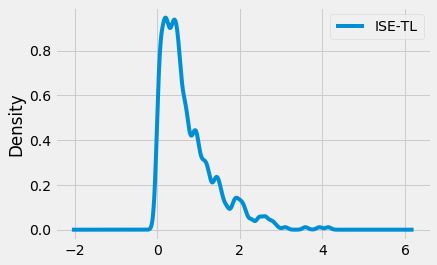

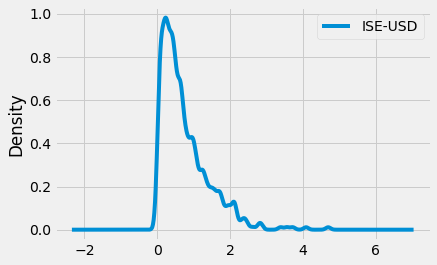

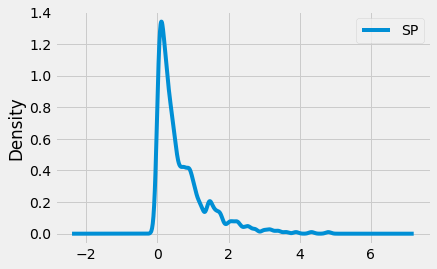

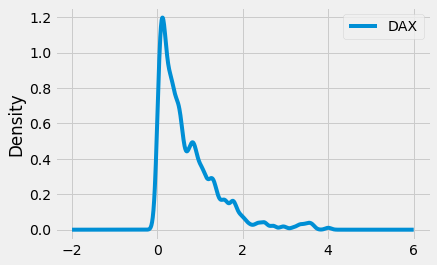

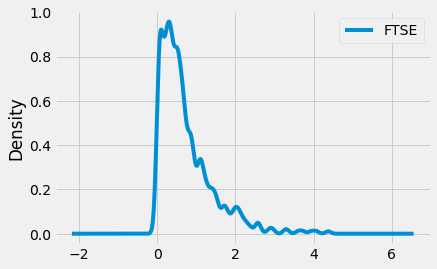

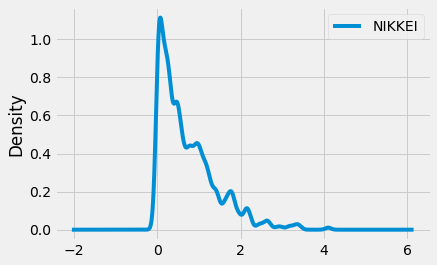

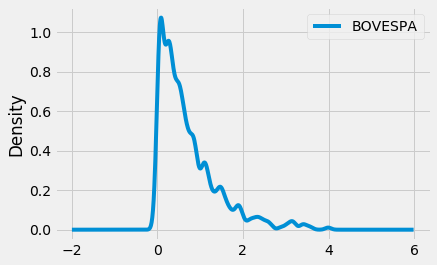

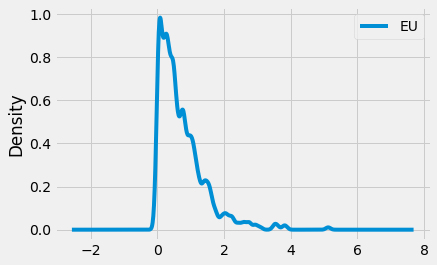

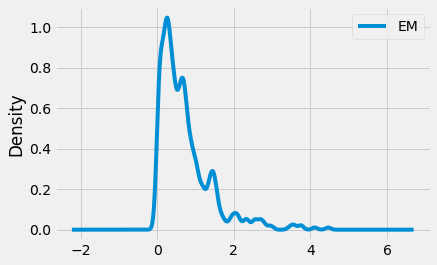

In [88]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

for d in d_list:
    d.plot.kde(bw_method=0.1)



In [91]:
from functools import reduce
df = reduce(lambda df1,df2: pd.merge(df1,df2,left_index=True,right_index=True), d_list)




dfx = (df.loc[df[f'{results[0][0]}'] >= 1.5])
i = 1
while(i < len(results)):
    dfx = (dfx.loc[dfx[f'{results[i][0]}'] >= 1.5])
    i += 1

    
dfc = (df.loc[df[f'{results[0][0]}'] <= -1.5])
i = 1
while(i < len(results)):
    dfc = (dfc.loc[dfc[f'{results[i][0]}'] <= -1.5])
    i += 1

    
    
    
    
    
    
    
L = dfx.index.tolist() + dfc.index.tolist()

Z = []
for n in L:
    Z.append(engine.execute(f''' 
    
    SELECT * FROM "{filename}" WHERE index = {n}
    ''').fetchall())

print("This/These rows seem to be anamolous")
print(Z)


This/These rows seem to be anamolous
[[(63, '2-Apr-09', 0.031401768, 0.052522395, 0.028322241, 0.058950531, 0.041933723, 0.043103753, 0.041073535, 0.046299865, 0.038506193)]]
